In [1]:
# Predict dates when the Earth-Moon distance is at a Minimum 
# On these days, a full Moon will appear especially large (SuperMoon)
# Tested with Python 3.5.1
# Created by: Sean Moore (sean.moore@physicstools.com)

In [2]:
import ephem as e
import pandas as pd

In [3]:
# Display graphics inline
%matplotlib inline

In [4]:
# Create the moon body object
moon=e.Moon()

In [5]:
startYear=e.Date('2016/1/1')
# For the curious, ephem stores dates as “Dublin Julian Day”
# which is the number of days (including any fraction) that have passed
# since the last day of year 1899, at noon

In [6]:
# Create empty data dictionaries for Moon-Earth Distances and Phase of Moon
dist={}
phase={}

In [7]:
# Compute position of Moon for each day in 2016
# Store the Moon-Earth distance into the dictionary 'dist' indexed by day
# Likewise, Store the phase of the Moon in dictionary 'phase' indexed by day
for thisDay in range(0,365):
    day=e.date(thisDay+startYear)
    moon.compute(day)
    dist[day]=moon.earth_distance
    phase[day]=moon.phase

In [8]:
# Create Pandas Time Series of Moon-Earth distances from dictionary
distTS = pd.Series(dist, name='Distance')

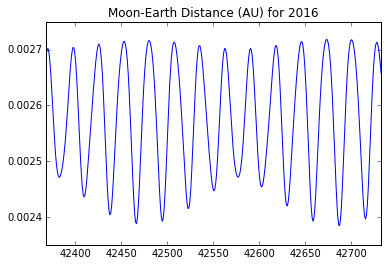

In [9]:
# Create a line plot of the Moon-Earth distance Time-Series
distTS.plot.line(title="Moon-Earth Distance (AU) for 2016");

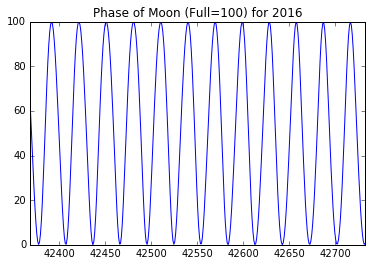

In [10]:
phaseTS=pd.Series(phase, name='Phase')
phaseTS.plot(title="Phase of Moon (Full=100) for 2016");

In [11]:
# Find and print the day for which the distance is at a minimum
print(e.date(distTS.idxmin()))

2016/11/14 00:00:00


In [12]:
# Print the minimum distance found
distTS[distTS.idxmin()]

0.0023846358526498079

In [13]:
# Show the phase of the Moon when distance is a minimum
phase[distTS.idxmin()]

99.32565307617188

In [14]:
# Search the next 100 years for a better SuperMoon
startYear=e.Date('2016/1/1')
dist={}
phase={}
for thisDay in range(0,365*100):
    day=e.date(thisDay+startYear)
    moon.compute(day)
    dist[day]=moon.earth_distance
    phase[day]=moon.phase
distTS = pd.Series(dist, name='Distance')

In [15]:
# Show the date and value of the new minimum
print(e.date(distTS.idxmin()))
print(distTS[distTS.idxmin()])

2034/11/26 00:00:00
0.0023827329278


In [16]:
# check the phase, make sure moon is full!
phase[distTS.idxmin()]

99.8182144165039